# Raport z zadania metoda gradientu prostego
## Import bibliotek

In [1]:
from functions import f1, gradient_f1, f2, gradient_f2
from plotter import plotter_1D, plotter_2D, plotter_3D
from gradientdescent import GradientDescent
from experiment import experiment_serie, create_table, create_summary
from tabulate import tabulate
import numpy as np

## Wykresy zadanych funkcji

### Funkcja 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


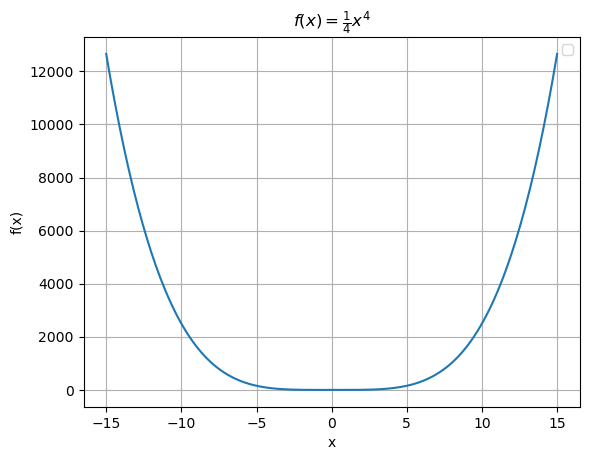

In [2]:
plotter_1D(f1, domain=(-15, 15), num_points=300, title="$f(x) = \\frac{1}{4}x^4$", x_label='x', y_label='f(x)')

### Funkcja 2

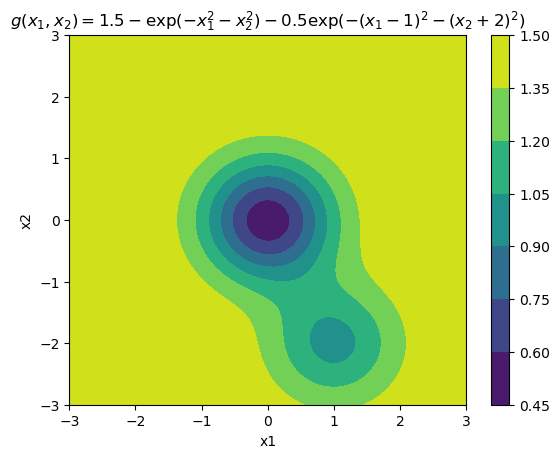

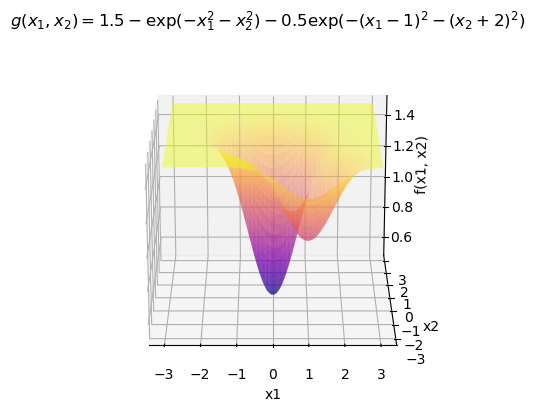

In [4]:
plotter_2D(f2, domain=[(-3, 3), (-3, 3)], title="$g(x_1, x_2) = 1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$")
plotter_3D(f2, domain=[(-3, 3), (-3, 3)], view=(20, -90), title="$g(x_1, x_2) = 1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$")

# Cel eksperymentów
Zamierzam sprawdzić działanie algorytmów dla różnych punktów startowych oraz hiperparametrów. Przeprowadzę badanie:
- 10 losowo wybranych punktów startowych
- 6 różnych wartości kroku gradientu (step/learning rate)
- 3 różnych liczb iteracji<br>

Spośród wyników dla każdej funkcji wyłonię najlepszą oraz najgorszą wartość i poddam je dalszej analizie.

## Funkcja 1

In [2]:
DOMAIN = (-4, 4)
START_POINTS = np.random.uniform(DOMAIN[0], DOMAIN[1], 10)
STEP_SIZES = (0.005, 0.01, 0.03, 0.06, 0.1, 0.2)
ITERATION_NUMBERS = (10000, 15000, 20000)
CORRECT_VALUE = 0
results, best, worst = experiment_serie(START_POINTS, f1, gradient_f1, STEP_SIZES, ITERATION_NUMBERS, CORRECT_VALUE)
table = create_table(*results)
# print(table["Error value"][0])
summary = create_summary(results[0], results[1], results[2], table)
print(tabulate(table, headers="keys", tablefmt="fancy_grid"))
print(tabulate(summary, headers="keys", tablefmt="fancy_grid"))
plotter_1D(f1, DOMAIN, best[0], best[1], num_points=500, title="Best $\\frac{1}{4}x^4$", x_label="x", y_label="f(x)", steps=True)
plotter_1D(f1, DOMAIN, worst[0], worst[1], num_points=500, title="Worst $\\frac{1}{4}x^4$", x_label="x", y_label="f(x)", steps=True)


/root/WSI/szymczyk_aleksander_wsi23z/Zad1/functions.py:5: RuntimeWarning: overflow encountered in power
  return np.array(1/4 * np.power(x, 4))
/root/WSI/szymczyk_aleksander_wsi23z/Zad1/functions.py:9: RuntimeWarning: overflow encountered in power
  return np.array(np.power(x, 3))
/root/WSI/szymczyk_aleksander_wsi23z/Zad1/gradientdescent.py:78: RuntimeWarning: invalid value encountered in subtract
  x0 = np.subtract(x0, d * self.step_size)


NameError: name 'tabulate' is not defined

## Funkcja 2

╒═════════════════════╤═════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════╤══════════╤═══════════════╕
│   Experiment number │   Step size │   Number of iterations │ Starting points           │ End x                     │    End y │   Error value │
╞═════════════════════╪═════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════╪══════════╪═══════════════╡
│                   1 │       0.005 │                   5000 │ [-1.96633674 -3.5618658 ] │ [-1.96535118 -3.56133867] │ 1.49999  │     4.06765   │
├─────────────────────┼─────────────┼────────────────────────┼───────────────────────────┼───────────────────────────┼──────────┼───────────────┤
│                   2 │       0.005 │                   5000 │ [-2.33965145 -3.32995696] │ [-2.33943977 -3.32986496] │ 1.5      │     4.06952   │
├─────────────────────┼─────────────┼────────────────────────┼───────────────────────────┼───────────────────────────┼──────

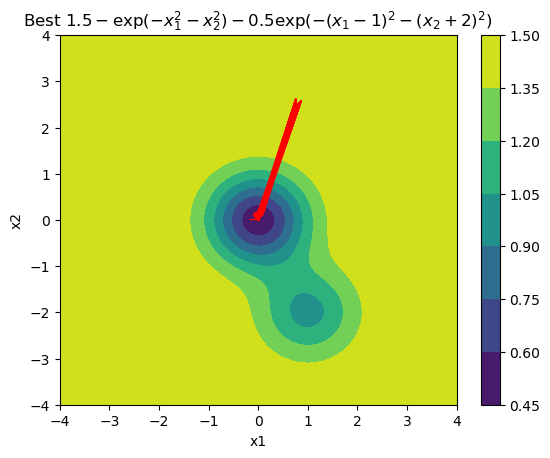

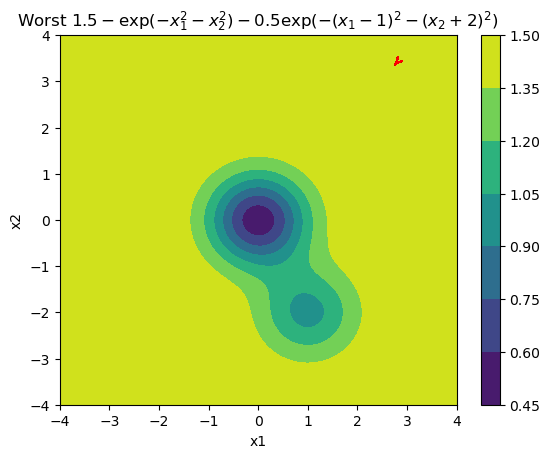

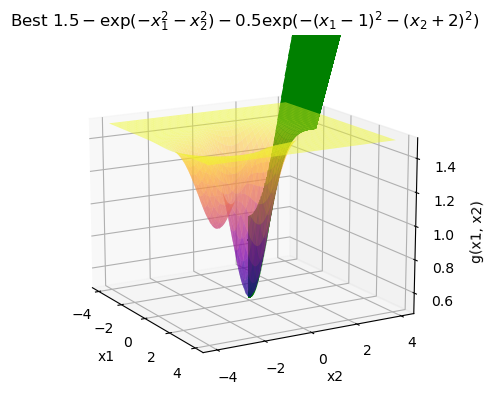

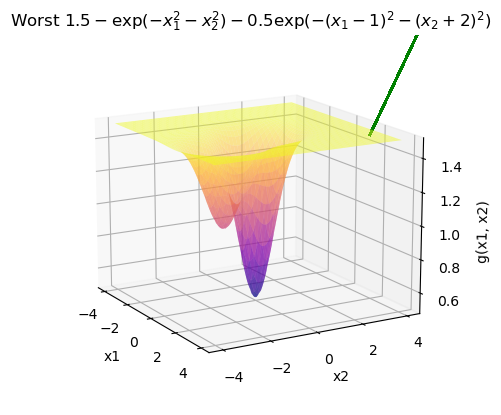

In [7]:
DOMAIN = [(-4, 4), (-4, 4)]
START_POINTS = []
for _ in range(10):
    x1 = np.random.uniform(DOMAIN[0][0], DOMAIN[0][1])
    x2 = np.random.uniform(DOMAIN[1][0], DOMAIN[1][1])
    START_POINT = np.array([x1, x2])
    START_POINTS.append(START_POINT)
STEP_SIZES = (0.005, 0.01, 0.03, 0.06, 0.1, 0.2)
ITERATION_NUMBERS = (5000, 10000, 15000)
CORRECT_VALUE = [0, 0]
results, best, worst = experiment_serie(START_POINTS, f2, gradient_f2, STEP_SIZES, ITERATION_NUMBERS, CORRECT_VALUE)
table = create_table(*results)
print(table)
plotter_2D(f2, DOMAIN, best[0], num_points=500, title="Best $1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$",
           x1_label="x1", x2_label="x2", steps=True)
plotter_2D(f2, DOMAIN, worst[0], num_points=500,
           title="Worst $1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$", x1_label="x1", x2_label="x2", steps=True)
plotter_3D(f2, DOMAIN, best[0], best[1], num_points=500,
           title="Best $1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$", x1_label="x1", x2_label="x2", x3_label="g(x1, x2)", steps=True)
plotter_3D(f2, DOMAIN, worst[0], worst[1], num_points=500,
           title="Worst $1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$", x1_label="x1", x2_label="x2", x3_label="g(x1, x2)", steps=True)

# Wyniki i wnioski
### Funkcja 1
Wyniki dla pierwszej funkcji pokazują, że największym problemem dla alogrytmu okazało się 'płaskie' otoczenie minimum funkcji. Punkty, które wygenerowały się daleko od minimum początkowo szybko kierowały się w jego stronę, jednak im były bliżej tym wartość gradientu gwałtownie się zmniejszała. <brb>
Z tego też powodu najlepsze wyniki algorytm osiągał dla punktów startowych jak najbliższych minimum. 
### Funkcja 2
Na wyniki algorytmu dla drugiej funkcji bardzo duży wpływ miał punkt startowy. Gdy był on zbyt daleko od minimum (lokalnego lub globalnego) dla niektórych punktów żadna wartość kroku gradientu czy liczba iteracji nie była w stanie przybliżyć początkowej wartości do minimum \- po całym przejściu algorytmu zostawał na poziomie g(x1, x2) = 1.5. <brb>
W przypadku gdy początkowy punkt znajdował się w pobliżu minimum lokalnego to również niezależnie od testowanego kroku gradientu oraz liczby iteracji algorytm nie mógł się z niego wydostać osiągając g(x1, x2) = 0.992742.<brb>
Jednakże części punktów, które dla mniejszych hiperparametrów przyjmowały wartość 1.5 udało się dotrzeć do minimum lokalnego, gdy zwiększony został krok gradientu oraz liczba iteracji.<brb>
Warto zaznaczyć, że gdy algorytm poprawnie kierował się do minimum to wyznaczał je bardzo dokładnie, niezależnie od wartości hiperparametrów.